# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [20]:
charges_mean = round(np.mean(medical.charges), 2)
charges_std = round(np.std(medical.charges), 2)

charges_median = round(np.median(medical.charges))

print(f"The mean charge is ${charges_mean} and the standard deviation of charges is ${charges_std}.")
print(f"The median charge is ${charges_median}.")

The mean charge is $13270.42 and the standard deviation of charges is $12105.48.
The median charge is $9382.


__A:__

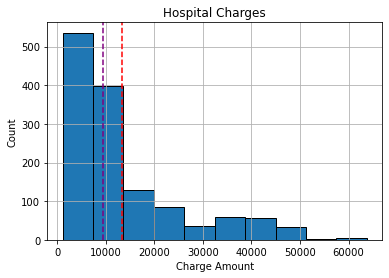

In [26]:
_ = plt.hist(medical['charges'], edgecolor='k')
_ = plt.title('Hospital Charges')
_ = plt.xlabel('Charge Amount')
_ = plt.ylabel('Count')
_ = plt.axvline(charges_mean, color='red', linestyle='--')
_ = plt.axvline(charges_median, color='purple', linestyle='--')
_ = plt.grid(True)

Note: This does not appear to be a normal distribution and the spread of data is quite large as indicated by the standard deviation.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Because we do not know the true standard deviation of the population, we should use the t-distribution to investigate. If we calculate a confidence interval of the mean and find the lower bound is $12,000 or less, we could be reasonably certain the hospital's average charge has fallen below the $12,000 threshold required for operational stability. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided interval is appropriate in this case. Illustrated below, we can conclude the administrator should not be concerned (as of now.) Using our one-tailed test, we can be 95% certain we have a true population mean charge of $12,621.19. This is above the level of concern for the administrator, $12,000.

In [36]:
n = len(medical.charges)
print(n)

df = len(medical.charges) - 1
print(df)

1338
1337


In [44]:
#1. Calculate Critical t Value
crit_t = t.ppf(0.975, df)

print(f"The critical t value is {round(crit_t, 2)}")

The critical t value is 1.96


In [46]:
#2. Calculate Standard Error
se = charges_std/np.sqrt(n)

print(f"The standard error is {round(se, 2)}")

The standard error is 330.94


In [50]:
#3. Calculate Margin of Error
me = crit_t * se

print(f"The margin of error is {round(me,2)}")

The margin of error is 649.23


In [51]:
#4. Calculate Confidence Interval
l_conf = charges_mean - me

print(f"The lower bound of our confidence interval is ${round(l_conf, 2)}")

The lower bound of our confidence interval is $12621.19


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
       
       Null Hypothesis: There is no difference in what patients without insurance are charged compared to what patients with insurance are charged.

       Alternative Hypothesis: Patients without insurance are charged differently than patients with insurance.

       We are assuming the standard deviation is the same for the two groups (pooled standard deviation)

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [65]:
#1. Split data by no insurance(0) and insurance (1)
no_ins = medical[medical['insuranceclaim'] == 0]
ins = medical[medical['insuranceclaim'] == 1]

In [76]:
no_ins.charges.describe()

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64

In [77]:
ins.charges.describe()

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64

In [71]:
#2. Get the count for each group
n0 = len(no_ins)
n1 = len(ins)

print(f"There are {n0} uninsured patients and {n1} insured patients.")

There are 555 uninsured patients and 783 insured patients.


In [73]:
#3 Calculate the mean for each group
x0 = np.mean(no_ins.charges)
x1 = np.mean(ins.charges)

print(f"The mean charge for uninsured patients is ${round(x0, 2)}, and the mean charge for insured patients is ${round(x1, 2)}.")

The mean charge for uninsured patients is $8821.42, and the mean charge for insured patients is $16423.93.


In [75]:
#4 Calculate the standard deviation for each group
s0 = np.std(no_ins.charges, ddof = 1)
s1 = np.std(ins.charges, ddof = 1)

print(f"The standard deviation of charges for uninsured patients is ${round(s0, 2)}, and the standard deviation of charges for insured patients is ${round(s1, 2)}.")

The standard deviation of charges for uninsured patients is $6446.51, and the standard deviation of charges for insured patients is $14045.93.


In [78]:
#5 Get the degrees freedom (denominator)
df = n0 + n1 - 2

print(df)

1336


In [87]:
#6 Calculate the pooled standard deviation
sp = np.sqrt(((((n0 - 1) * s0**2) + ((n1 - 1) * s1**2))/(df)))

print(f"The pooled standard deviation is ${round(sp, 2)}")

The pooled standard deviation is $11520.03


In [90]:
#7 Calculate t
t = (x0 - x1)/(np.sqrt(((1/n0) + (1/n1))) * sp)

print(f"The t value is {t}")

The t value is -11.89329903087671


In [91]:
#8 t-test using scipy.stats
from scipy import stats
stats.ttest_ind(no_ins.charges, ins.charges)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A__: I could not find an equivalent for performing a z-test in the documentation, but a google search mentioned 'scipy.stats.norm.sf(abs(x)).' I am honestly unsure and would like clarity on this!

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test